# 0. Importação de Bibliotecas e Setup do Ambiente

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats 

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import sweetviz as sv

# Machine Learning
from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn.preprocessing import LabelEncoder


from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as ltb
import xgboost as xgb

## LazyPredict - AutoML
# https://github.com/shankarpandala/lazypredict
# from lazypredict.Supervised import LazyRegressor

#Others
# import pickle
import warnings
from IPython.display       import Image

warnings.filterwarnings( 'ignore' )

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# !pip install shap

In [ ]:
import shap

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
def diagnostic(df, variable):
    # plot the histograms to have a quick look at the distributions
    # we can plot Q-Q plots to visualise if the variable is normally distributed
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Importação dos Datasets

In [ ]:
# path = r'C:\Users\Arthur Messias\Downloads\mobilitycars\treino.csv'
path = 'treino.csv'
df_raw = pd.read_csv(path)
df_train = df_raw.copy()

In [ ]:
# pathvalidation = r'C:\Users\Arthur Messias\Downloads\mobilitycars\teste.csv'
pathvalidation = 'teste.csv'
df_validation_raw = pd.read_csv(pathvalidation)
df_validation= df_validation_raw.copy()

# 2. Exploração e Limpeza de dados

## 2.1 Visualização Preliminar dos Dados

In [ ]:
df_train.sample(2)

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
22786,310303343511260806266777028372453766430,8.0,VOLKSWAGEN,SAVEIRO,1.6 CROSS CD 16V FLEX 2P MANUAL,2019,2019.0,33688.0,Manual,4,Picape,N,Branco,PF,Joanópolis,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,30832.249084
28800,286052636010640997320689839186590643847,8.0,BMW,430i,2.0 16V GASOLINA GRAN COUPÉ M SPORT AUTOMÁTICO,2018,2018.0,56765.0,Automática,4,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,172500.888860


## 2.2. Data Dimensions and Columns

In [ ]:
print(f'number of rows: {df_train.shape[0]}')
print(f'number of columns: {df_train.shape[1]}')

df_train.columns  # already in snake case! :)

number of rows: 39446
number of columns: 29


Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao', 'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono', 'attr_veiculo_todas_as_revisões_feitas_pela_concessionária', 'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado', 'attr_veiculo_garantia_de_fábrica', 'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro', 'attr_veiculo_alienado', 'preco'], dtype='object')

## 2.3. Data Types

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ID                                                          39446 non-null  object 
 1   num_fotos                                                   39209 non-null  float64
 2   marca                                                       39446 non-null  object 
 3   modelo                                                      39446 non-null  object 
 4   versao                                                      39446 non-null  object 
 5   ano_de_fabricacao                                           39446 non-null  int64  
 6   ano_modelo                                                  39446 non-null  float64
 7   odometro                                                    39446 non-null  float64
 

## 2.4. Check NA

In [ ]:
df_train.isna().sum().sum()

199274

In [ ]:
df_train.isna().sum()

ID                                                                0
num_fotos                                                       237
marca                                                             0
modelo                                                            0
versao                                                            0
ano_de_fabricacao                                                 0
ano_modelo                                                        0
odometro                                                          0
cambio                                                            0
num_portas                                                        0
tipo                                                              0
blindado                                                          0
cor                                                               0
tipo_vendedor                                                     0
cidade_vendedor                                 

## 2.5. Check Non Unique

In [ ]:
print(f"qtde de linhas: {df_train.shape[0]}  -  qtde de códigos únicos: {df_train['ID'].nunique()}")

qtde de linhas: 39446  -  qtde de códigos únicos: 39446


In [ ]:
df_train['marca'].value_counts().reset_index().sort_index(ascending=True).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
index,VOLKSWAGEN,CHEVROLET,TOYOTA,HYUNDAI,JEEP,FIAT,BMW,AUDI,PEUGEOT,HONDA,MERCEDES-BENZ,FORD,MITSUBISHI,LAND ROVER,RENAULT,NISSAN,KIA,PORSCHE,VOLVO,CITROËN,TROLLER,RAM,JAGUAR,CHERY,MINI,LEXUS,SUBARU,SUZUKI,DODGE,CHRYSLER,SSANGYONG,SMART,MASERATI,LIFAN,ALFA ROMEO,JAC,FERRARI,EFFA,IVECO,BRM,LAMBORGHINI
marca,6140,4020,2882,2740,2667,2523,2375,2291,2246,2097,1501,1445,1148,1027,711,583,565,470,363,248,223,221,212,202,182,91,54,51,47,40,20,16,12,10,10,5,2,2,2,1,1


## 2.6. Column Labels Adjusting

In [ ]:
# TODO: Como são df's iguais em forma, criar uma function

df_train.rename(columns = { 'attr_veiculo_aceita_troca': 'aceita_troca', 
                            'attr_veiculo_único_dono': 'unico_dono',
                            'attr_veiculo_todas_as_revisões_feitas_pela_concessionária': 'revisoes',
                            'attr_veiculo_ipva_pago': 'ipva_pago',
                            'attr_veiculo_licenciado': 'licenciado',
                            'attr_veiculo_garantia_de_fábrica': 'garantia_de_fabrica',
                            'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro': 'revisoes_agenda',
                            'attr_veiculo_alienado': 'alienado'
                            }, inplace=True)

df_validation.rename(columns = { 'attr_veiculo_aceita_troca': 'aceita_troca', 
                                  'attr_veiculo_único_dono': 'unico_dono',
                                  'attr_veiculo_todas_as_revisões_feitas_pela_concessionária': 'revisoes',
                                  'attr_veiculo_ipva_pago': 'ipva_pago',
                                  'attr_veiculo_licenciado': 'licenciado',
                                  'attr_veiculo_garantia_de_fábrica': 'garantia_de_fabrica',
                                  'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro': 'revisoes_agenda',
                                  'attr_veiculo_alienado': 'alienado'
                                  }, inplace=True)

In [ ]:
df_train.columns

Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao', 'aceita_troca', 'unico_dono', 'revisoes', 'ipva_pago', 'licenciado', 'garantia_de_fabrica', 'revisoes_agenda', 'alienado', 'preco'], dtype='object')

## 2.7. Fill NaN

In [ ]:
## fill na
df_train['num_fotos'] = df_train['num_fotos'].fillna(0)
df_validation['num_fotos'] = df_validation['num_fotos'].fillna(0)

df_train['aceita_troca'] = df_train['aceita_troca'].map({'Aceita troca': 1, np.nan: 0})
df_train['unico_dono'] = df_train['unico_dono'].map({'Único dono': 1, np.nan: 0})
df_train['revisoes'] = df_train['revisoes'].map({'Todas as revisões feitas pela concessionária': 1, np.nan: 0})
df_train['ipva_pago'] = df_train['ipva_pago'].map({'IPVA pago': 1, np.nan: 0})
df_train['licenciado'] = df_train['licenciado'].map({'Licenciado': 1, np.nan: 0})
df_train['garantia_de_fabrica'] = df_train['garantia_de_fabrica'].map({'Garantia de fábrica': 1, np.nan: 0})
df_train['revisoes_agenda'] = df_train['revisoes_agenda'].map({'Todas as revisões feitas pela agenda do carro': 1, np.nan: 0})
df_train['alienado'] = df_train['aceita_troca'].map({'Aceita troca': 1, np.nan: 0})

df_validation['aceita_troca'] = df_validation['aceita_troca'].map({'Aceita troca': 1, np.nan: 0})
df_validation['unico_dono'] = df_validation['unico_dono'].map({'Único dono': 1, np.nan: 0})
df_validation['revisoes'] = df_validation['revisoes'].map({'Todas as revisões feitas pela concessionária': 1, np.nan: 0})
df_validation['ipva_pago'] = df_validation['ipva_pago'].map({'IPVA pago': 1, np.nan: 0})
df_validation['licenciado'] = df_validation['licenciado'].map({'Licenciado': 1, np.nan: 0})
df_validation['garantia_de_fabrica'] = df_validation['garantia_de_fabrica'].map({'Garantia de fábrica': 1, np.nan: 0})
df_validation['revisoes_agenda'] = df_validation['revisoes_agenda'].map({'Todas as revisões feitas pela agenda do carro': 1, np.nan: 0})


In [ ]:
# change types
df_train['blindado'] = df_train['blindado'].map({'S': 1, 'N': 0})
df_validation['blindado'] = df_validation['blindado'].map({'S': 1, 'N': 0})

df_train['ano_modelo'] = df_train['ano_modelo'].astype('int64')
df_train['num_fotos'] = df_train['num_fotos'].astype('int64')
df_validation['ano_modelo'] = df_validation['ano_modelo'].astype('int64')
df_validation['num_fotos'] = df_validation['num_fotos'].astype('int64')

df_train['blindado'] = df_train['blindado'].astype('int64')
df_validation['blindado'] = df_validation['blindado'].astype('int64')

In [ ]:
df_train['alienado'].value_counts()

Series([], Name: alienado, dtype: int64)

# 3. Feature Engineering

In [ ]:
df_train.sample(3).T

,23917,1369,11611
ID,262311073289944346928594854442811367226,109790719772054991983923512023706194241,281069887402317196272636443098492257778
num_fotos,14,8,8
marca,NISSAN,BMW,VOLVO
modelo,FRONTIER,320i,S60
versao,2.3 16V TURBO DIESEL SE CD 4X4 AUTOMÁTICO,2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO,2.0 T5 DYNAMIC GASOLINA 4P AUTOMÁTICO
ano_de_fabricacao,2017,2017,2004
ano_modelo,2018,2017,2011
odometro,78729.0,76084.0,102821.0
cambio,Automática,Automática,Automática
num_portas,4,4,4


## 3.1. Check NAN

In [ ]:
df_train.isna().sum().sum()

39446

In [ ]:
df_validation.isna().sum()

ID                         0
num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
odometro                   0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
tipo_anuncio               0
entrega_delivery           0
troca                      0
elegivel_revisao           0
aceita_troca               0
unico_dono                 0
revisoes                   0
ipva_pago                  0
licenciado                 0
garantia_de_fabrica        0
revisoes_agenda            0
alienado               39446
dtype: int64

In [ ]:
cols_drop = [ 'alienado' ]

df_train = df_train.drop(columns=cols_drop)
df_validation = df_validation.drop(columns=cols_drop)

## Tratando Outliers

In [ ]:
# plt.hist(df_train['preco'])

## Seleção de Features

<AxesSubplot:xlabel='ano_modelo', ylabel='preco'>

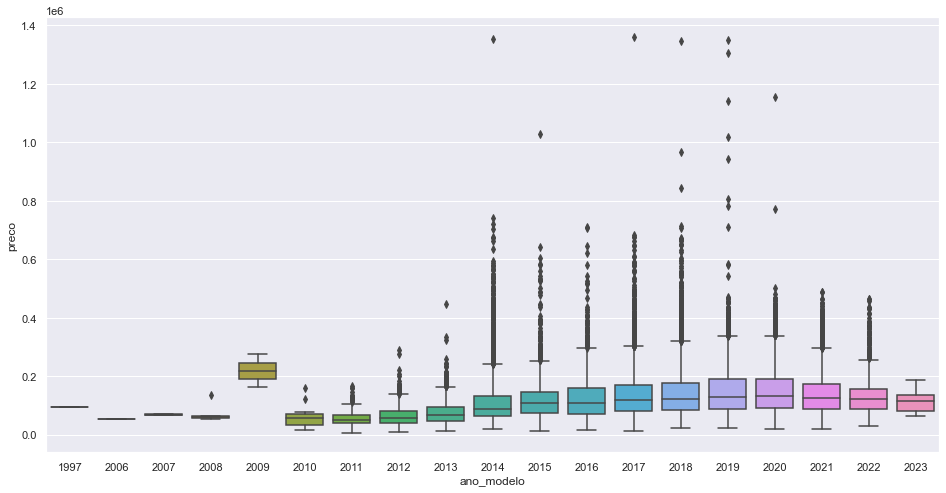

In [ ]:
['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'odometro',
       'num_portas', 'preco']

df_train2 = df_train

plt.figure(figsize=(16,8))

# plt.subplot(1,3,1)
sns.boxplot(x='ano_modelo' , y='preco' , data=df_train2)

# plt.subplot(1,3,2)
# sns.boxplot(x='odometro' , y='preco' , data=df_train2)

# plt.subplot(1,3,3)
# sns.boxplot(x='num_portas' , y='preco' , data=df_train2)

## 3.2 Rescaling

In [ ]:
# # Central Tendency - mean, median
# ct1 = pd.DataFrame(df_traing_num.apply(np.mean)).T
# ct2 = pd.DataFrame(df_traing_num.apply(np.median)).T

# # Dispersion - std, min, max, range, skew, kurtosis
# d1 = pd.DataFrame(df_traing_num.apply(np.std)).T
# d2 = pd.DataFrame(df_traing_num.apply(min)).T
# d3 = pd.DataFrame(df_traing_num.apply(max)).T
# d4 = pd.DataFrame(df_traing_num.apply(lambda x: x.max() - x.min())).T
# d5 = pd.DataFrame(df_traing_num.apply(lambda x: x.skew())).T
# d6 = pd.DataFrame(df_traing_num.apply(lambda x: x.kurtosis())).T

# m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
# m.columns = ['attributes', 'min', 'max','range','mean','median','std','skew','kurtosis']
# m

## 3.3. Encoding

In [ ]:
df_train.sample(2).T

,17035,22653
ID,71534639668659966609509783123498270376,120803921645950488786302296189499380031
num_fotos,16,8
marca,HYUNDAI,FIAT
modelo,TUCSON,TORO
versao,2.0 MPFI GLS 16V 143CV 2WD FLEX 4P AUTOMÁTICO,1.8 16V EVO FLEX FREEDOM AT6
ano_de_fabricacao,2014,2019
ano_modelo,2014,2019
odometro,75640.0,42623.0
cambio,Automática,Automática
num_portas,4,4


In [ ]:
df_train['motor'] = df_train['versao'].str[:4]
df_validation['motor'] = df_validation['versao'].str[:4]

df_train['idade_modelo'] = 2022 - df_train['ano_modelo']
df_validation['idade_modelo'] = 2022 - df_validation['ano_modelo']

In [ ]:
df = df_train[['ano_modelo','odometro','preco']].groupby(['ano_modelo','odometro']).median().reset_index()
df['km_preco'] = df[['odometro','preco']].apply(lambda x: x['odometro']/x['preco'], axis = 1)
dict_km_preco = df[['ano_modelo','km_preco']].groupby('ano_modelo').median().to_dict()['km_preco']

df_train['km_preco_enconding'] = df_train['ano_modelo'].map(dict_km_preco)
df_validation['km_preco_enconding'] = df_validation['ano_modelo'].map(dict_km_preco)

df_train['ano'] = (df_train['ano_modelo'] + df_train['ano_de_fabricacao'])/2
df_validation['ano'] = (df_validation['ano_modelo'] + df_validation['ano_de_fabricacao'])/2

In [ ]:
def target_enconding(df_traing,df_validation,attribute):
    
    # Preço médio por atributo
    df_train.groupby([attribute])['preco'].count()
    df_train.groupby([attribute])['preco'].mean()
    mean_encoded_dict = df_train.groupby([attribute])['preco'].mean().to_dict()
    
    # Enconding
    df_train[attribute]      = df_train[attribute].map(mean_encoded_dict)
    df_validation[attribute] = df_validation[attribute].map(mean_encoded_dict)
    
    return df_train, df_validation

def estado_cor_encoding(df_train,df_validation):
    df_train['estado_cor'] = df_train[['estado_vendedor','cor','preco']].apply(lambda x: x['estado_vendedor'] + ' - ' + x['cor'], axis=1)
    df_validation['estado_cor'] = df_validation[['estado_vendedor','cor']].apply(lambda x: x['estado_vendedor'] + ' - ' + x['cor'], axis=1)

    dict_estado_cor = df_train[['estado_cor','preco']].groupby('estado_cor').median().to_dict()['preco']

    df_train['estado-cor_enconding'] = df_train['estado_cor'].map(dict_estado_cor)
    df_validation['estado-cor_enconding'] = df_validation['estado_cor'].map(dict_estado_cor)
    
    return df_train, df_validation

def ano_modelo_odometro_encoding(df_train,df_validation):
    df_train['ano_modelo_odometro'] = df_train[['ano_modelo','odometro','preco']].apply(lambda x: x['ano_modelo'] + ' - ' + x['cor'], axis=1)
    df_validation['estado_cor'] = df_validation[['estado_vendedor','cor']].apply(lambda x: x['estado_vendedor'] + ' - ' + x['cor'], axis=1)

    dict_estado_cor = df_train[['estado_cor','preco']].groupby('estado_cor').median().to_dict()['preco']

    df_train['estado-cor_enconding'] = df_train['estado_cor'].map(dict_estado_cor)
    df_validation['estado-cor_enconding'] = df_validation['estado_cor'].map(dict_estado_cor)
    
    return df_train, df_validation

attributes_mean_encoding = ['versao', 'marca','modelo', 'cambio', 'tipo', 'cidade_vendedor', 'motor']

for att in attributes_mean_encoding:
    df_train, df_validation = target_enconding(df_train,df_validation,att)
    
df_train, df_validation= estado_cor_encoding(df_train, df_validation)

    
def func(df_train):
    df_train['tipo_vendedor'] = df_train['tipo_vendedor'].map({'PF': 1, 'PJ': 0})
    df_train['tipo_vendedor'] = df_train['tipo_vendedor'].astype('int64')

    df_train['tipo_anuncio']=df_train['tipo_anuncio'].map({'Pessoa Física': 'pessoa_fisica', 'Concessionária': 'concessionaria', 'Acessórios e serviços para autos': 'acessorios', 'Loja': 'loja'})
    df_train = pd.get_dummies(df_train, columns=['tipo_anuncio'], prefix = ['ta_'])
    
    return df_train

df_train = func(df_train)
df_validation = func(df_validation)

## Tranformações

In [ ]:
df_train['preco'] = np.log1p(df_train['preco'])

In [ ]:
df_train.sample(3).T

,11640,33836,22820
ID,277196258637077513152151676974137947634,243611131423934508677107296087064652850,12402987520742438611573535841960366998
num_fotos,8,16,8
marca,122361.749137,118864.653876,100155.595254
modelo,124756.346147,86594.484318,110243.281129
versao,127504.577807,72641.702739,156999.148548
ano_de_fabricacao,2021,2018,2018
ano_modelo,2022,2018,2019
odometro,57300.0,81926.0,38342.0
cambio,146579.444142,146579.444142,115251.19281
num_portas,4,4,4


In [ ]:
#Frequency

# marca1 = (df.groupby('marca').size()) / len(df)
# df['marca'] = df['marca'].apply(lambda x : marca1[x])

# modelo1 = (df.groupby('modelo').size()) / len(df)
# df['modelo'] = df['modelo'].apply(lambda x : modelo1[x])

# cambio1 = (df.groupby('cambio').size()) / len(df)
# df['cambio'] = df['cambio'].apply(lambda x : cambio1[x])

# tipo1 = (df.groupby('tipo').size()) / len(df)
# df['tipo'] = df['tipo'].apply(lambda x : tipo1[x])

# cidade_vendedor1 = (df.groupby('cidade_vendedor').size()) / len(df)
# df['cidade_vendedor'] = df['cidade_vendedor'].apply(lambda x : cidade_vendedor1[x])

In [ ]:
df_validation.sample(3).T

,10424,15233,34006
ID,19336424570975899434713048442838788369,51007884149051504251061252640318124600,285074347520047155918079973711468516160
num_fotos,8,8,8
marca,118864.653876,118864.653876,100155.595254
modelo,188016.073299,119604.194132,74984.060461
versao,248531.723471,122363.747135,49647.608054
ano_de_fabricacao,2018,2012,2008
ano_modelo,2018,2014,2012
odometro,64549.0,99788.0,137483.0
cambio,146579.444142,146579.444142,80328.343354
num_portas,4,4,4


In [ ]:
# cols_drop = ['cor','estado_vendedor']

# df_train = df_train.drop(columns=cols_drop)
# df_validation = df_validation.drop(columns=cols_drop)

In [ ]:
df_train.sample(3).T

,8143,37899,25379
ID,255120441717815114091155684640352995143,88685192499607257994671447027053714171,18060785674851137622930963554261847681
num_fotos,15,17,14
marca,161363.144695,138480.542097,82280.596828
modelo,135603.058223,149075.431984,64100.756753
versao,142546.871982,136475.302724,44403.443493
ano_de_fabricacao,2013,2021,2012
ano_modelo,2015,2021,2012
odometro,66322.0,16564.0,113586.0
cambio,146579.444142,146579.444142,80328.343354
num_portas,4,4,4


In [ ]:
df_validation.sample(3).T

,37402,7502,36526
ID,61065946530180692523668174336934985197,256373878196746714160247411011638586704,175886926363492852050996340901143937010
num_fotos,8,8,8
marca,200118.573156,82280.596828,84588.97835
modelo,181489.306511,74594.941988,109289.905007
versao,160072.056119,90248.738518,132839.140313
ano_de_fabricacao,2016,2021,2014
ano_modelo,2017,2021,2017
odometro,46735.0,37482.0,65977.0
cambio,146579.444142,146579.444142,146579.444142
num_portas,4,4,4


In [ ]:
df_train.columns

Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'entrega_delivery', 'troca', 'elegivel_revisao', 'aceita_troca', 'unico_dono', 'revisoes', 'ipva_pago', 'licenciado', 'garantia_de_fabrica', 'revisoes_agenda', 'preco', 'motor', 'idade_modelo', 'km_preco_enconding', 'ano', 'estado_cor', 'estado-cor_enconding', 'ta__acessorios', 'ta__concessionaria', 'ta__loja', 'ta__pessoa_fisica'], dtype='object')

## 3.3 Separando Dataset em Treino e Test

In [ ]:
# treino
X_full = df_train[['versao','marca', 'modelo','odometro','cambio','tipo', 'cidade_vendedor','motor','ano','estado-cor_enconding','km_preco_enconding']]
y_full = df_train['preco']

# validation
X_valid = df_validation[['versao','marca', 'modelo','odometro','cambio','tipo', 'cidade_vendedor','motor','ano','estado-cor_enconding','km_preco_enconding']]

X_train, X_test, y_train, y_test = train_test_split( X_full, y_full, test_size=0.20, random_state=42)

In [ ]:
X_full.head()

,versao,marca,modelo,odometro,cambio,tipo,cidade_vendedor,motor,ano,estado-cor_enconding,km_preco_enconding
0,131535.788104,118864.653876,182866.374487,55672.0,146579.444142,159605.703146,126858.181814,150265.726555,2017.0,108295.930361,0.642595
1,260124.440884,223453.245531,265969.455964,47858.0,146579.444142,225908.426740,132172.449766,150265.726555,2017.0,132558.593030,0.642595
2,60509.440259,93135.094963,88113.881275,122323.0,146579.444142,118647.979849,132172.449766,91646.221564,2012.5,99585.953992,1.489613
3,302935.323779,316500.644566,404300.455891,14207.0,146579.444142,159605.703146,126858.181814,150265.726555,2020.5,105182.229435,0.199439
4,174077.213901,197789.362549,258674.002124,43760.0,146579.444142,225908.426740,163260.666402,150265.726555,2015.5,108295.930361,0.724326


## Lazy Predict

In [ ]:
# from sre_constants import ANY
# from tkinter import ALL
# from sklearn.metrics import mean_absolute_error

# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mean_absolute_error)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

## Modelo Machine Learning

### Testando a Regressão com LGBM

In [ ]:
### Parametros retornados da seção fine tuning
model_lgbm = ltb.LGBMRegressor(base_score=0.5, booster='gbtree', learning_rate=0.05,
                               max_depth=20, min_child_weight=4, n_estimators=700)

model_lgbm.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model_lgbm.predict(X_test)

plt.style.use('ggplot')

# Dado que as variáveis estão em escala logaritma, fazemos a transformação inversa (exp)
print(metrics.mean_absolute_error(np.expm1(expected_y), np.expm1(predicted_y)))

[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: booster
24877.186022641574


### Testando a Regressão com XGBoost

In [ ]:
# Parametros retornados da seção fine tuning
param_tuned = {'n_estimators': 900, 'eta': 0.03, 'max_depth': 9, 'subsample': 0.1, 'colsample_bytree': 0.3, 'min_child_weigth': 3}

model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators=param_tuned['n_estimators'], 
                              eta=param_tuned['eta'], 
                              max_depth=param_tuned['max_depth'], 
                              subsample=param_tuned['subsample'],
                              colsample_bytree=param_tuned['colsample_bytree'],
                              min_child_weigth = param_tuned['min_child_weigth'])

model_xgb.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model_xgb.predict(X_test)

plt.style.use('ggplot')

# Dado que as variáveis estão em escala logaritma, fazemos a transformação inversa (exp)
print(metrics.mean_absolute_error(np.expm1(expected_y), np.expm1(predicted_y)))

[17:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_weigth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


25384.32072384433


### Fine Tuning

In [ ]:
# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]

# ## Hyper Parameter Optimization
# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=model_xgb,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(X_train,y_train)

# random_cv.best_estimator_

# Treino com o Dateset Full

In [ ]:
model_lgbm_full = ltb.LGBMRegressor(base_score=0.5, booster='gbtree', learning_rate=0.05,
                                    max_depth=15, min_child_weight=4, n_estimators=900)

model_lgbm_full.fit(X_full, y_full)

model_submission = np.expm1(model_lgbm_full.predict(X_valid))

model_submission

[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: booster


array([ 61377.23842561, 110001.96377092,  91006.78018077, ...,
       140557.14286002, 380201.22970163,  59689.04984242])

In [ ]:
model_submission

array([ 61377.23842561, 110001.96377092,  91006.78018077, ...,
       140557.14286002, 380201.22970163,  59689.04984242])

## Avaliação dos Modelos

In [ ]:
# Relevancia das variáveis no modelo de treino
# explainer = shap.TreeExplainer(model_lgbm)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Avalia o modelo
# shap.summary_plot(shap_values, X_test)

In [ ]:
# Avalia o impacto das variáveis no modelo de submissão
# explainer = shap.TreeExplainer(model_lgbm_full)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

## Submission

In [ ]:
df_submission = pd.concat([df_validation_raw['ID'], pd.DataFrame(model_submission)], axis=1)
df_submission.columns = ['ID','preco']
df_submission.to_csv('submission_19.csv', index=False)

In [ ]:
df_submission.head()

,ID,preco
0,24813264385557040124808779273028388499,61377.238426
1,295636316453795508942188530111300065666,110001.963771
2,101258309166227950735244624080888109884,91006.780181
3,28348734455782469411126661985772047409,72817.467426
4,193163160502972147671913739170248305797,114894.293352


In [ ]:
# Relevancia das variáveis no modelo de treino
# explainer = shap.TreeExplainer(model_lgbm)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

# Avalia o modelo
# shap.summary_plot(shap_values, X_test)

# Avalia o impacto das variáveis no modelo de submissão
# explainer = shap.TreeExplainer(model_lgbm_full)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")